In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

dir= '/content/drive/My Drive/MLProject/Datacl'
categories= ['Tshirt','kurti', 'shirt', 'skirt']
data=[]
for category in categories:
  path=os.path.join(dir,category)
  label=categories.index(category)

  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    clt_img=cv2.imread(imgpath,0)
    clt_img=cv2.resize(clt_img,(50,50))
    image=np.array(clt_img).flatten()

    data.append([image,label])


In [ ]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [ ]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

In [ ]:
import random
random.shuffle(data)
features=[]
labels=[]

for feature, label in data:
  features.append(feature)
  labels.append(label)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(features, labels, test_size=0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='liblinear')
lg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=lg.predict(xtest)
pred

array([1, 1, 3, 0, 0, 3, 0, 0, 3, 0, 1, 0, 3, 3, 3, 3, 0, 1, 0, 2, 3, 3,
       2, 1, 2, 1, 2, 2, 0, 1, 3, 1, 0, 3, 2, 1, 3, 1, 3, 0, 2, 2, 1, 1,
       0, 3, 1, 0, 3, 1, 0, 0, 3, 3, 3, 1, 1, 2, 1, 2, 2, 1, 0, 2, 3, 2,
       1, 3, 2, 2, 0, 3, 0, 1, 3, 3, 2, 3, 0, 1, 1, 0, 1, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 3, 3,
       1, 2, 3, 2, 2, 0, 3, 0, 0, 0, 2, 2, 0, 0, 3, 0, 3, 2, 1, 3, 3, 1,
       1, 1, 1, 0, 0, 3, 3, 1])

In [ ]:
scores=lg.score(xtest,ytest)
print("Accuracy is :",scores*100,'%')

Accuracy is : 66.42857142857143 %


prediction is:  kurti


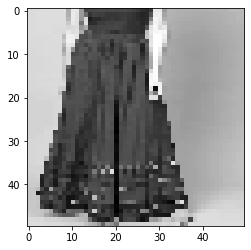

In [ ]:
categories= ['Tshirt','kurti', 'shirt', 'skirt']
print("prediction is: ", categories[prediction[5]])
mycloth=xtest[5].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

prediction is:  skirt


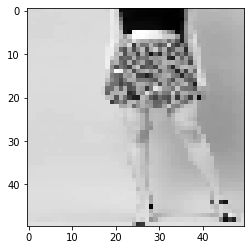

In [ ]:
print("prediction is: ", categories[prediction[13]])
mycloth=xtest[13].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

prediction is:  shirt


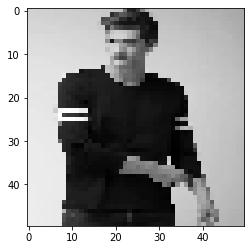

In [ ]:
print("prediction is: ", categories[prediction[9]])
mycloth=xtest[9].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.46      0.78      0.58        23
           1       0.83      0.75      0.79        40
           2       0.73      0.49      0.58        39
           3       0.67      0.68      0.68        38

    accuracy                           0.66       140
   macro avg       0.67      0.68      0.66       140
weighted avg       0.70      0.66      0.67       140



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,pred)
cm

array([[18,  1,  3,  1],
       [ 0, 30,  2,  8],
       [16,  0, 19,  4],
       [ 5,  5,  2, 26]])

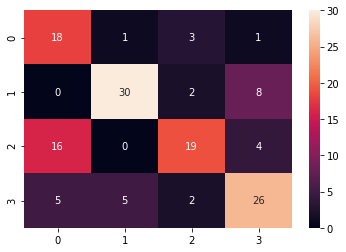

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(ytest)
ytest = lb.transform(ytest)
pred = lb.transform(pred)
roc=roc_auc_score(ytest, pred, average='macro')
print("AUC Score:" , roc)

AUC Score: 0.7834692023218806
